# 3D non-linear function

This is a 3D version of the function used to illustrate some solver behaviours when solving a non-linear function.

Each "bump" is similar to a 3D version of a Normal probability distribution. A bump can be positioned on the xy plane. A positive scale makes a bump, while a negative scale makes a hollow.

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math

In [2]:
def objective(xy):
    xPosition = [ 1.0, -0.5,  0.0]
    yPosition = [-1.0,  0.0,  0.0]
    Scale = [0.5, 1.8, -2.0]
    e = math.exp(1)
    z = 0
    for t in range(0, len(xPosition)):
       z += Scale[t] * (e**(-1 * (xy[1] - xPosition[t])**2) * e**(-1 * (xy[0] - yPosition[t])**2))
    return z

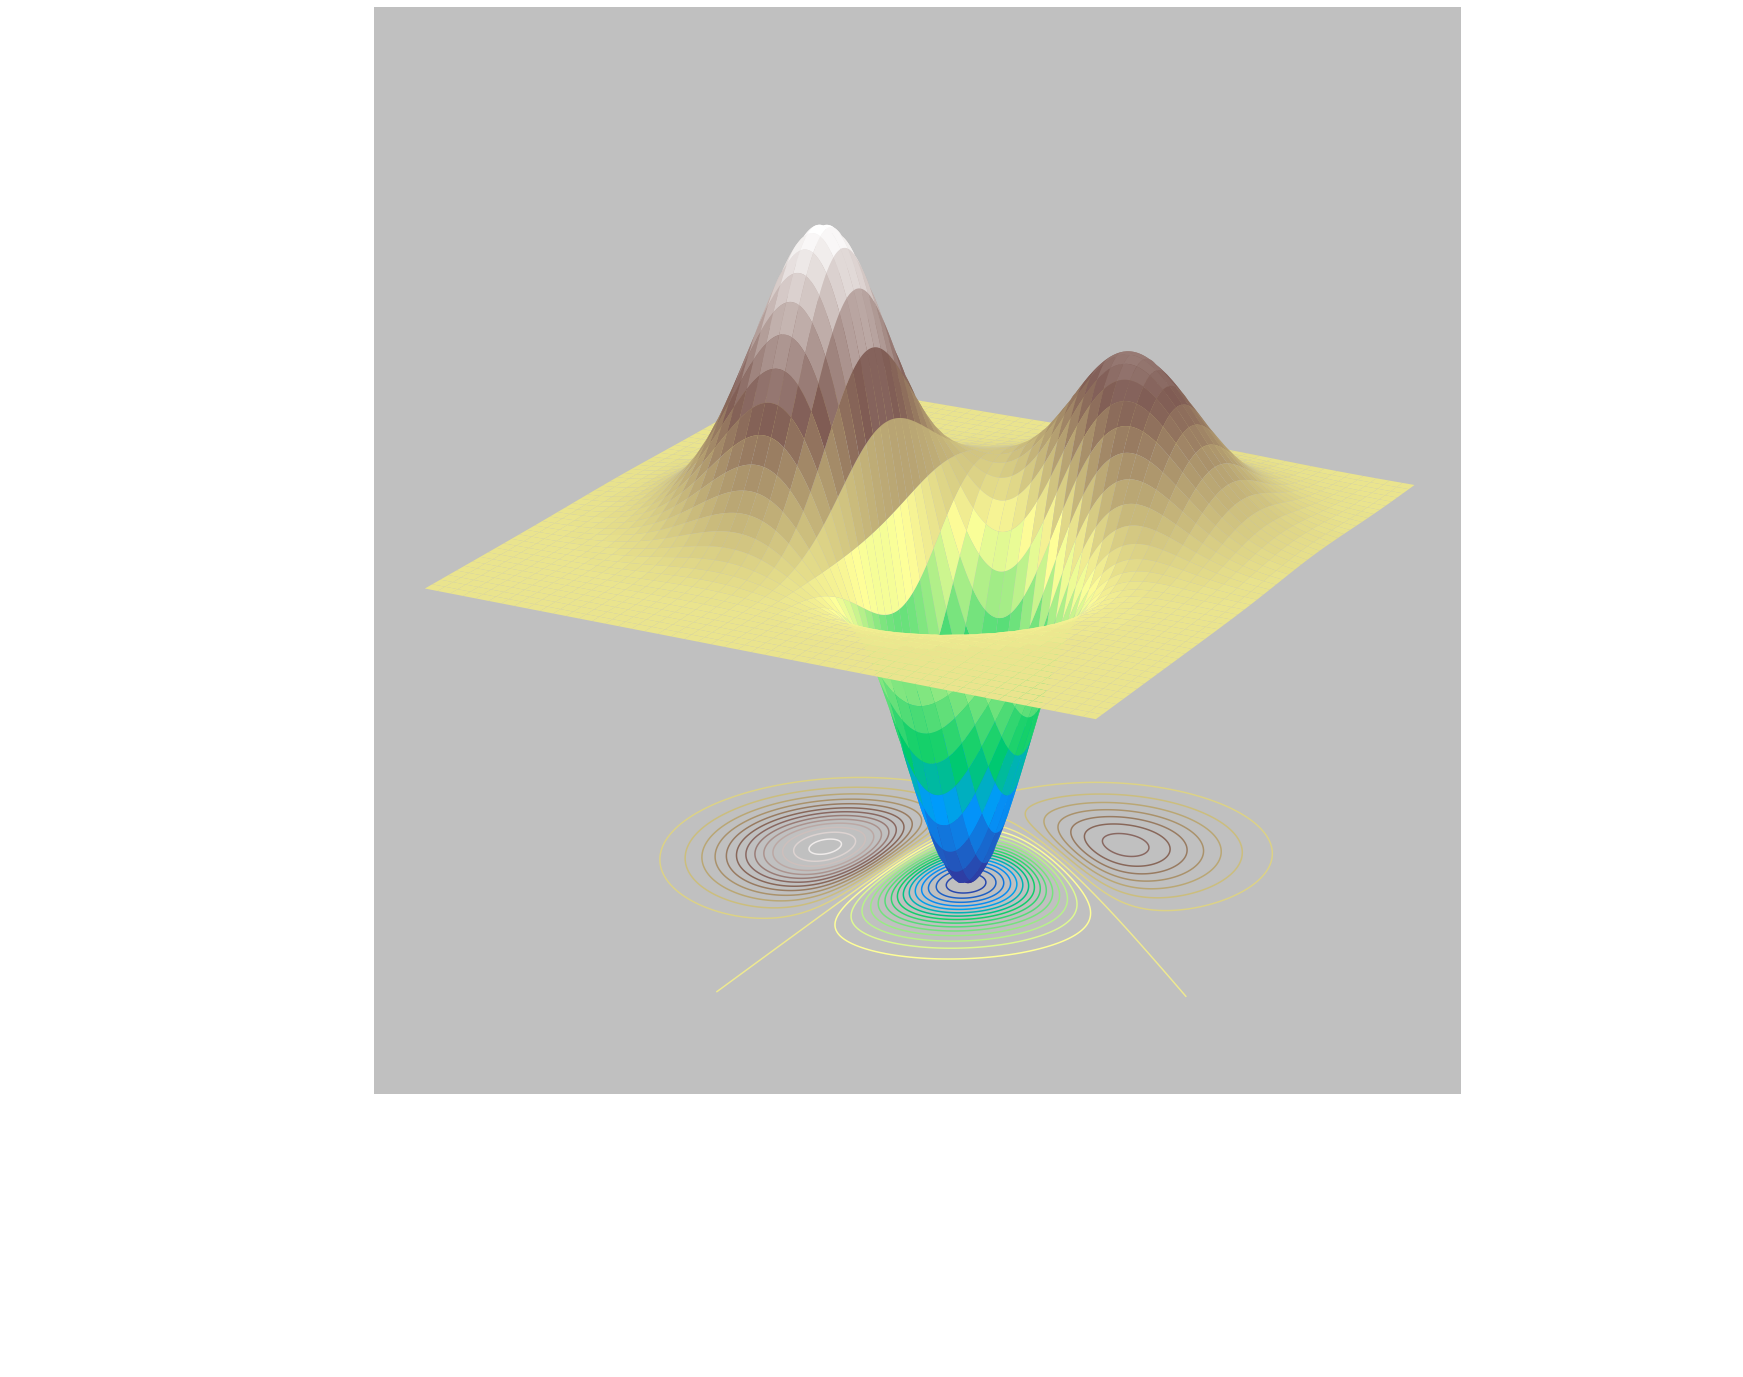

In [3]:
x = np.arange(-3, 3, 0.01)
y = np.arange(-3, 3, 0.01)
xgrid, ygrid = np.meshgrid(x, y)
xy = np.stack([xgrid, ygrid])
fig = plt.figure(figsize = (20, 20))
ax = fig.add_subplot(111, projection = '3d')
ax.azim = 28
ax.elev = 20
ax.dist = 5.5
ax.set_xlim3d(-5, 5)
ax.set_ylim3d(-5, 5)
ax.set_zlim3d(-1, 1)

ax.plot_surface(xgrid, ygrid, objective(xy), cmap = 'terrain')
ax.contour(xgrid, ygrid, objective(xy), levels = 30, zdir ='z', offset = np.min(objective(xy)), cmap = 'terrain')   # or ax.contourf

ax.set_facecolor('silver')
w = (1.0, 1.0, 1.0, 0.0)
ax.xaxis.set_pane_color(w); ax.yaxis.set_pane_color(w); ax.zaxis.set_pane_color(w)   # Hide panes
ax.xaxis.line.set_color(w); ax.yaxis.line.set_color(w); ax.zaxis.line.set_color(w)   # Hide spines
ax.set_xticks([]); ax.set_yticks([]); ax.set_zticks([])   # Hide ticks 

plt.show()